In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
movies = pd.read_csv("movies.csv")
print(movies.head(5))

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [103]:
movie_ids = np.array(movies["movieId"])
titles = movies["title"].tolist()

In [104]:
def get_movie_title(movie_id):
    I = np.where(movie_ids == movie_id)[0]
    if len(I) == 0:
        return 'unknown'
    else:
        return titles[I[0]]

In [9]:
ratings = pd.read_csv("ratings.csv")
print(ratings.head(5))

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


In [11]:
user_ids = np.array(ratings["userId"])
user_movies = np.array(ratings["movieId"])
user_ratings = np.array(ratings["rating"])

In [12]:
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
movie_col = M.columns.tolist()
user_row = M.index.tolist()

In [13]:
print(M.head(5))

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN     4.0     NaN     NaN     NaN     NaN     NaN   

movieId  9       10       ...    161084  161155  161594  161830  161918  \
userId                    ...                                             
1           NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN   
2           NaN     4.0   ...       NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN   ...       NaN     NaN     NaN     NaN     NaN   
4           NaN     4.0   ...       NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN 

In [14]:
Mfill = M.fillna(0)
print(Mfill.head(5))

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           0.0     0.0     4.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10       ...    161084  161155  161594  161830  161918  \
userId                    ...                                             
1           0.0     0.0   ...       0.0     0.0     0.0     0.0     0.0   
2           0.0     4.0   ...       0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0   ...       0.0     0.0     0.0     0.0     0.0   
4           0.0     4.0   ...       0.0     0.0     0.0     0.0     0.0   
5           0.0     0.0 

In [21]:
Mfill = np.array(Mfill)

In [17]:
print("Users: %i\nMovies: %i"%(Mfill.shape[0],Mfill.shape[1]))

Users: 671
Movies: 9066


In [26]:
Mmean = np.mean(Mfill,0)
Mstd = np.std(Mfill,0)
X = (Mfill - Mmean[None,:]) / Mstd[None,:]

In [39]:
U,S,Vt = np.linalg.svd(X,full_matrices=False)

Text(0,0.5,'POV')

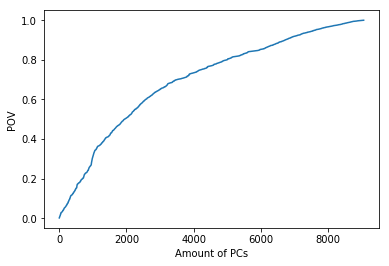

In [30]:
Mvar = Mstd ** 2
POV = np.cumsum(Mvar) / np.sum(Mvar)
plt.plot(POV)
plt.xlabel("Amount of PCs")
plt.ylabel("POV")

In [113]:
r = 50
Xest = Vt[:r,]

In [114]:
Mest = (Xest - Mmean[None,:]) / Mstd[None,:]

In [115]:
ind = 10   # Row index
ntop = 20  # Print the ntop movie recommendations
actual = X[ind]
pred = Mest[ind]
top_rated = np.argsort(pred)
for i in range(20):
    j = top_rated[i]
    print("Movie: %s\tPredicted rating: %0.2f\tActual rating: %0.2f"%(get_movie_title(j), pred[j], actual[j])) 

Movie: Training Day (2001)	Predicted rating: -2.81	Actual rating: -0.04
Movie: Deterrence (1999)	Predicted rating: -1.43	Actual rating: -0.04
Movie: unknown	Predicted rating: -1.43	Actual rating: -0.04
Movie: unknown	Predicted rating: -1.16	Actual rating: -0.05
Movie: Strawberry and Chocolate (Fresa y chocolate) (1993)	Predicted rating: -0.97	Actual rating: -0.97
Movie: unknown	Predicted rating: -0.96	Actual rating: -0.04
Movie: Legends of the Fall (1994)	Predicted rating: -0.93	Actual rating: 1.33
Movie: unknown	Predicted rating: -0.91	Actual rating: -0.91
Movie: unknown	Predicted rating: -0.88	Actual rating: -0.88
Movie: Eat Drink Man Woman (Yin shi nan nu) (1994)	Predicted rating: -0.84	Actual rating: -0.84
Movie: Boxing Helena (1993)	Predicted rating: -0.79	Actual rating: -0.79
Movie: unknown	Predicted rating: -0.77	Actual rating: -0.05
Movie: Governess, The (1998)	Predicted rating: -0.77	Actual rating: -0.76
Movie: I'll Do Anything (1994)	Predicted rating: -0.73	Actual rating: -0.

In [120]:
npc = 4
ntop = 5

for row in Vt[-4:]:
    print(get_movie_title(np.argsort(abs(row))[0]))

Love in the Afternoon (1957)
unknown
American Movie (1999)
unknown
